# K-means Clustering using Simple 1-D Arrays

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import tensorflow as tf

### To plot pretty figures inline in the notebook

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [7]:
!pip install --upgrade tensorflow
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

Requirement already up-to-date: tensorflow in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: six>=1.10.0 in /usr/local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: tensorflow-tensorboard<0.2.0,>=0.1.0 in /usr/local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: numpy>=1.11.0 in /usr/local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: mock>=2.0.0 in /usr/local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: protobuf>=3.3.0 in /usr/local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: wheel in /usr/local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: backports.weakref>=1.0rc1 in /usr/local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: werkzeug>=0.11.10 in /usr/local/lib/python2.7/site-packages (from tensorflow-tensorboard<0.2.0,>=0.1.0->tensorflow)


### Set up any 1-D array at random

* Notice that this data is clustered around 0-10 and around 80-120

In [8]:
input_1d_x = np.array([1, 2, 3.0, 4, 5, 126, 21, 33, 6, 73.0, 2, 3, 56, 98, 100, 4, 8, 33, 102], dtype=np.float32)

### Input function to generate features and labels for the estimator

*This is an unsupervised algorithm so we generate only the features, labels is set to None*

* The function takes in a 1-D array as an input and converts it to a Tensor
* Expands its dimensions [1, 2, 3] -> [[1], [2], [3]] to get a feature vector
* Returns a tuple of features and labels

In [12]:
def input_fn_1d(input_1d):
    input_t = tf.convert_to_tensor(input_1d, dtype=tf.float32)
    input_t = tf.expand_dims(input_t, 1)
    
    return (input_t, None)

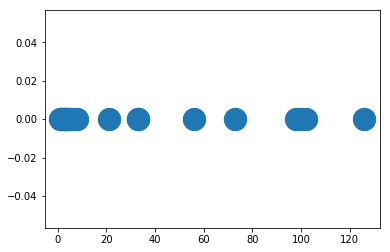

In [13]:
plt.scatter(input_1d_x, np.zeros_like(input_1d_x), s=500)
plt.show()

In [14]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans

### TensorFlow documentation

https://www.tensorflow.org/api_docs/python/tf/contrib/learn/KMeansClustering

__init__(
    num_clusters,
    model_dir=None,
    initial_clusters=RANDOM_INIT,
    distance_metric=SQUARED_EUCLIDEAN_DISTANCE,
    random_seed=0,
    use_mini_batch=True,
    mini_batch_steps_per_iteration=1,
    kmeans_plus_plus_num_retries=2,
    relative_tolerance=None,
    config=None
)

In [20]:
k_means_estimator = kmeans.KMeansClustering(num_clusters=2)

fit = k_means_estimator.fit(input_fn=lambda: input_fn_1d(input_1d_x), steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11bafe090>, '_model_dir': '/var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpsUkkyJ', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpsUkkyJ/model.ckpt.
INFO:tensorflow:loss = 5915.0, step = 1
INFO:tensorflow:global_step/sec: 1453.76
INFO:tensorflow:loss = 4612.58, step = 101

### The centroids of the clusters

In [21]:
clusters_1d = k_means_estimator.clusters()
clusters_1d

array([[  9.61472225],
       [ 92.50209045]], dtype=float32)

### Plot the cluster centers along with the points 

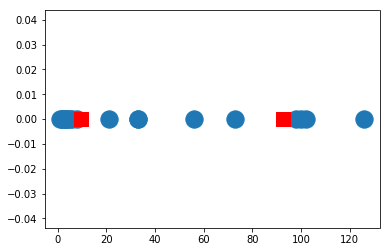

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(input_1d_x, np.zeros_like(input_1d_x), s=300, marker='o')
ax1.scatter(clusters_1d, np.zeros_like(clusters_1d), c='r', s=200, marker='s')

plt.show()

In [23]:
k_means_estimator.get_params()

{'params': {'distance_metric': 'squared_euclidean',
  'kmeans_plus_plus_num_retries': 2,
  'mini_batch_steps_per_iteration': 1,
  'num_clusters': 2,
  'random_seed': 0,
  'relative_tolerance': None,
  'training_initial_clusters': 'random',
  'use_mini_batch': True}}

In [26]:
for variable_name in fit.get_variable_names():
   print(variable_name, " ---> " , fit.get_variable_value(variable_name))

Variable  --->  [13001  6001]
clusters  --->  [[  9.61472225]
 [ 92.50209045]]
global_step  --->  1000
initialized  --->  True


### Transforms each element to distances to cluster centers.

*Note that the transform() function expects the input exactly like how we specified the feature vector*

In [27]:
ex_1d_x = np.array([0, 100], dtype=np.float32)

transform = k_means_estimator.transform(input_fn=lambda: input_fn_1d(ex_1d_x))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpsUkkyJ/model.ckpt-1000


### The distance is measured in squared Euclidean distance
*Get the square root to find actual distances*

In [30]:
np.sqrt(transform)

array([[  9.61472225,  92.50209045],
       [ 90.38527679,   7.49791622]], dtype=float32)

In [31]:
clusters_1d

array([[  9.61472225],
       [ 92.50209045]], dtype=float32)

### Predicts which cluster each point belongs to

*Note that the predict() function expects the input exactly like how we specified the feature vector*

In [33]:
# Change the 50 to 54 and it will move to the next cluster
ex_1d_x = np.array([50, 150], dtype=np.float32)

predict = k_means_estimator.predict(input_fn=lambda: input_fn_1d(ex_1d_x), as_iterable=False)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpsUkkyJ/model.ckpt-1000


In [34]:
predict

{'all_scores': array([[  1630.97070312,   1806.42773438],
        [ 19708.02734375,   3306.00976562]], dtype=float32),
 'cluster_idx': array([0, 1])}